# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

## Condições do experimento

-

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [1]:
max_edges = 500 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"

## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [2]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [3]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 500 edges out of 229338 available (0.22% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [4]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [5]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [6]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [7]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [8]:
categorical_features = [
    'category1',
    'category2',
    'category3',
    'category4',
    'category5',
    'category6',
    'category7',
    'category8',
    'category9',
    'category10',
    'language',
    'coverType',
    'publisher',
    'rankingCategory',
    'authors'
]

numeric_features = [
    #'degree',
    #'eigenvector_centrality',
    #'betweenness_centrality',
    'ranking',
    'reviewCount',
    'pages',
    'weight',
    'height',
    'width',
    'depth',
    'rating'
]

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [9]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [10]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [11]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,209.000000,209,209,209,205,206,0.0,65,145,145,145,143,131,116,55,3,0.0,0.0,0.0,207,207,207,209.0,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,209.000000,209.000000,209.000000
unique,NaN,209,209,188,2,61,NaN,65,1,1,6,12,15,31,21,2,NaN,NaN,NaN,207,207,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Introduction to Differential Geometry of Space...,https://www.amazon.com.br/dp/1305272420/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,6 de outubro de 2003,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Matemática Pura,Cálculo,Abstrata,NaN,NaN,NaN,0465054722,978-0070542341,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,5,132,46,NaN,1,145,145,137,120,72,21,9,2,NaN,NaN,NaN,1,1,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1358.755981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,304.721148,148633.914522,442.433984,5.305556,4.544444,16.480350,23.370490,2.470005,508.523240,2.056343e+09,0.042595,4.430622,0.015921
std,987.898709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,395.376513,94756.970384,248.552573,3.666139,0.320823,2.595949,2.043063,1.148541,216.617141,1.161107e+09,0.052606,10.942429,0.051687
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.920000,1053.000000,68.000000,1.000000,1.000000,10.000000,17.000000,0.500000,40.800000,1.612626e+07,0.000798,1.000000,0.000000
25%,300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,57.870000,78944.000000,272.000000,5.305556,4.544444,14.000000,21.600000,1.500000,358.000000,1.088718e+09,0.012119,1.000000,0.000000
50%,1756.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,126.070000,150863.486486,400.000000,5.305556,4.544444,16.000000,23.400000,2.400000,513.595238,1.993779e+09,0.025794,2.000000,0.003673
75%,1993.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,447.980000,169899.000000,576.000000,5.305556,4.544444,18.300000,24.600000,3.200000,635.000000,2.930320e+09,0.056808,3.000000,0.011020


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [12]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.087357,19,0.169215
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.308116,62,0.218662
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,5.305556,4.544444,14.4,20.8,0.8,200.0,1260550007,0.258043,54,0.302294
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.116720,18,0.083062
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.401867,86,0.458575
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.175059,42,0.195847
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,5.305556,4.544444,13.7,21.5,0.8,159.0,744636978,0.048330,9,0.012963
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.012439,9,0.022396
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,5.305556,4.544444,13.6,20.3,2.3,522.0,1246026773,0.126375,23,0.094610
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,

## Random forest using various features, price as target

### Preparing data

In [13]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.200956937799
Train features shape:  (167, 339)
Train target shape:  (167,)
Test features shape:  (42, 339)
Test target shape:  (42,)


### Average price as baseline

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [14]:
average_target = np.average(target)
print "Average price: R$", average_target

Average price: R$ 298.53760479041927


### Cross val

#### Run cross val

In [15]:
rf, scores = shared_functions.run_cross_validation_regression(features, target)

#### Cross val score

In [16]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.6831566282800431
RF relative abs std:  0.13669873928354184
Baseline relative mean:  2.6788058997328004
Baseline relative std:  0.7162442390722369
=== Absolute
RF abs mean:  165.62570102941177
RF abs std:  77.79533594781087
Baseline mean:  278.359335153223
Baseline std:  75.47439270011586


####  List of most important features

In [17]:
importance = zip(feature_list, rf.feature_importances_)
importance.sort(key=lambda x:-x[1])
pd.DataFrame(importance).head(200)

,0,1
0,coverType_Capa dura,2.269010e-01
1,pages,6.373733e-02
2,"authors_Lars V. Ahlfors (Autor),",6.360251e-02
3,publisher_McGraw-Hill Science/Engineering/Math,6.013188e-02
4,height,5.516951e-02
5,publisher_Cengage Learning,5.035027e-02
6,sha256_id,4.791939e-02
7,authors_S. M. Neill C. M. Ridley (Autor),4.506981e-02
8,width,3.893916e-02
9,ranking,3.865597e-02


## Test dataset and visual inspection

In [18]:
test_predictions = rf.predict(test_features)

### Predicted price vs real price

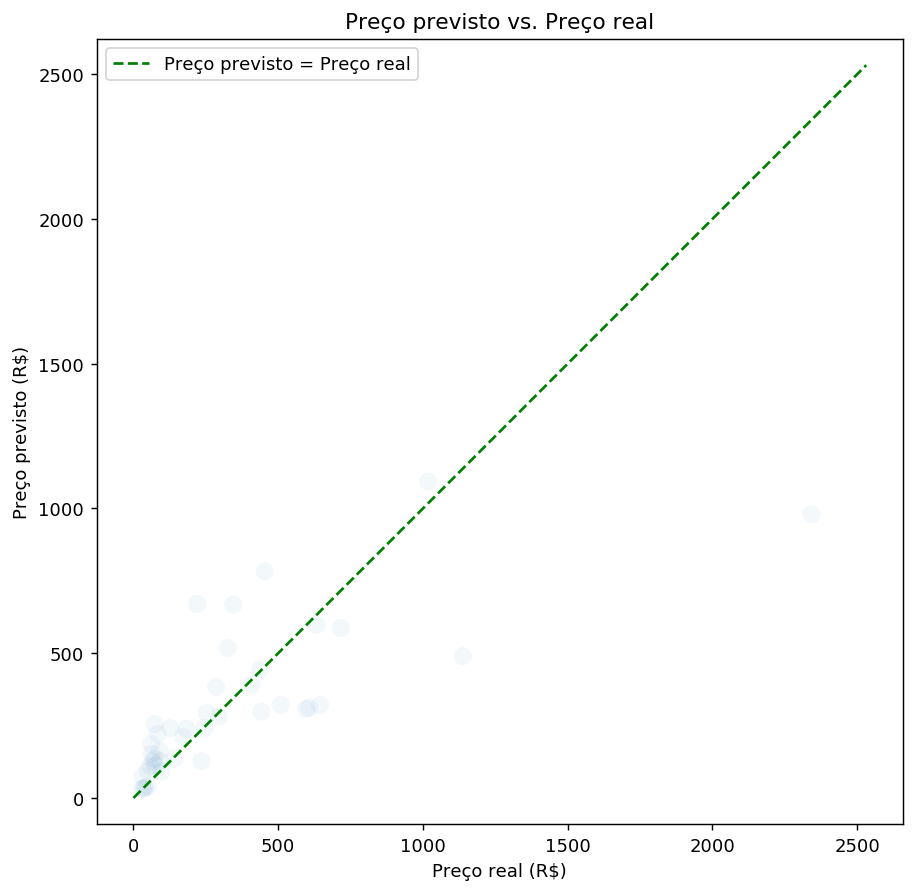

In [19]:
shared_functions.plot_predicted_vs_real_price(test_target, test_predictions, target)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [20]:
errors, errors_baseline, errors_relative, errors_baseline_relative = shared_functions.print_mean_absolute_error(test_predictions, test_target, average_target)

== Absolute
('Mean absolute prediction error: R$', 148.75)
('Std prediction error: R$', 233.51)
('Mean absolute error using average: R$', 261.26)
('Std prediction error using average: R$', 319.63)
== Relative
('Mean relative absolute prediction error: ', 0.6)
('Std relative prediction error: ', 0.6)
('Mean relative absolute error using average: ', 2.09)
('Std relative prediction error using average: ', 2.43)


### Join data

In [21]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, test_features, test_target, test_predictions, errors, errors_relative, errors_baseline, errors_baseline_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [22]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.731114e+09,"[1731113829.0, 150863.486486, 5.30555555556, 6...",1361.6350,2042.662395,0.872485,0.581597,979.5650,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,150863.486486,688.000000,5.305556,4.544444,20.3,25.4,3.2,513.595238,0.025794,1,0.000000
8.325317e+08,"[832531727.0, 150863.486486, 5.30555555556, 40...",647.6132,838.912395,0.737538,0.569355,489.8368,1137.45,1696,Real Analysis: Modern Techniques and Their App...,https://www.amazon.com.br/dp/0471317160/,"Gerald B. Folland (Autor),",Capa dura,Wiley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471317160,978-0471317166,Inglês,1,1137.45,150863.486486,408.000000,5.305556,4.544444,16.4,24.1,2.8,635.000000,0.033865,2,0.001934
3.215418e+09,"[3215418182.0, 2409.0, 39.0, 1048.0, 513.59523...",450.9462,79.177605,0.360948,2.055736,670.3062,219.36,181,Princípios de Química,https://www.amazon.com.br/dp/8540700387/,Peter Atkins (Autor),Capa dura,Bookman,NaN,NaN,Livros,Livros,Medicina,Ciência Básica,Bioquímica,NaN,NaN,NaN,NaN,NaN,NaN,8540700387,978-8540700383,Português,1,219.36,2409.000000,1048.000000,39.000000,4.700000,22.0,28.4,4.0,513.595238,0.012119,1,0.000000
4.696563e+07,"[46965632.0, 191386.0, 5.30555555556, 656.0, 5...",329.4478,154.922395,0.341645,0.726520,782.9078,453.46,325,Gravity: An Introduction to Einstein's General...,https://www.amazon.com.br/dp/0805386629/,"James B. Hartle (Autor),",Capa dura,Addison-Wesley Professional,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Gravidade,NaN,NaN,NaN,NaN,NaN,0805386629,978-0805386622,Inglês,1,453.46,191386.000000,656.000000,5.305556,4.544444,19.6,23.9,3.8,513.595238,0.021946,1,0.000000
1.597585e+08,"[159758473.0, 389816.0, 5.30555555556, 302.0, ...",323.6592,45.492395,0.132234,0.940788,667.6892,344.03,1961,Introduction to Tensor Analysis and the Calcul...,https://www.amazon.com.br/dp/1461478669/,"Pavel Grinfeld (Autor),",Capa dura,Springer,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,Geometria Diferencial,NaN,NaN,NaN,NaN,1461478669,978-1461478669,Inglês,1,344.03,389816.000000,302.000000,5.305556,4.544444,16.3,23.1,2.5,522.000000,0.060451,4,0.011264
4.469486e+08,"[446948600.0, 150863.486486, 5.30555555556, 56...",323.4170,345.792395,0.536670,0.501943,320.9130,644.33,1693,Topology (Classic Version) (2nd Edition),https://www.amazon.com.br/dp/0134689518/,James Munkres (Autor),Capa comum,Pearson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0134689518,978-0134689517,Inglês,1,644.33,150863.486486,560.000000,5.305556,4.544444,17.8,22.6,3.3,816.000000,0.021946,1,0.000000
2.998072e+09,"[2998071556.0, 150863.486486, 5.30555555556, 5...",294.5526,308.102395,0.507883,0.485548,312.0874,606.64,1986,Student Solutions Manual for Stewart's Single ...,https://www.amazon.com.br/dp/1305272420/,"James Stewart (Autor),",Capa comum,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1305272420,978-1305272422,Inglês,1,606.64,150863.486486,576.000000,5.305556,4.544444,20.3,25.4,3.3,794.000000,0.012119,1,0.000000
7.897180e+08,"[789717993.0, 150863.486486, 5.30555555556, 60...",289.0290,297.592395,0.499207,0.484842,307.1010,596.13,1838,Introduction to Mechanics and Symmetry: A Basi...,https://www.amazon.com.br/dp/1441931430/,"Jerrold E. Marsden (Autor),",Capa comum,Springe

### Worst relative predictions

In [23]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.644459e+09,"[2644458574.0, 150863.486486, 5.30555555556, 4...",181.5250,224.937605,3.056217,2.466372,255.1250,73.60,2169,100 Instructive Calculus-Based Physics Example...,https://www.amazon.com.br/dp/1941691137/,Chris McMullen (Autor),NaN,Zishka Publishing,NaN,17 de maio de 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941691137,978-1941691137,Inglês,1,73.60,150863.486486,451.175676,5.305556,4.544444,21.600000,27.900000,2.30000,980.000000,0.037914,2,0.007124
9.919350e+08,"[991934982.0, 150863.486486, 5.30555555556, 34...",125.4070,237.667605,3.904511,2.060243,186.2770,60.87,1881,Discrete Mathematics: An Open Introduction,https://www.amazon.com.br/dp/1534970746/,Oscar Levin (Autor),Capa comum,Createspace Independent Publishing Platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534970746,978-1534970748,Inglês,1,60.87,150863.486486,346.000000,5.305556,4.544444,15.200000,22.900000,2.00000,358.000000,0.096199,5,0.016136
3.215418e+09,"[3215418182.0, 2409.0, 39.0, 1048.0, 513.59523...",450.9462,79.177605,0.360948,2.055736,670.3062,219.36,181,Princípios de Química,https://www.amazon.com.br/dp/8540700387/,Peter Atkins (Autor),Capa dura,Bookman,NaN,NaN,Livros,Livros,Medicina,Ciência Básica,Bioquímica,NaN,NaN,NaN,NaN,NaN,NaN,8540700387,978-8540700383,Português,1,219.36,2409.000000,1048.000000,39.000000,4.700000,22.000000,28.400000,4.00000,513.595238,0.012119,1,0.000000
4.245651e+09,"[4245651027.0, 3310.0, 33.0, 656.0, 998.0, 23....",137.6910,214.637605,2.558255,1.641132,221.5910,83.90,829,Curso Intensivo de Python,https://www.amazon.com.br/dp/8575225030/,"Eric Matthes (Autor),",Capa comum,Novatec,NaN,NaN,Livros,Livros,"Computação, Informática e Mídias Digitais",Programação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8575225030,978-8575225035,Português,1,83.90,3310.000000,656.000000,33.000000,4.800000,16.800000,23.000000,3.60000,998.000000,0.016563,1,0.000000
1.032933e+09,"[1032933267.0, 63811.0, 5.30555555556, 128.0, ...",44.9154,268.677605,8.997910,1.504200,74.7754,29.86,40,Basic Machines and How They Work,https://www.amazon.com.br/dp/0486217094/,"U S Navy (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,"Industrial, Fabricação e Sistemas Operacionais",Maquinaria,NaN,NaN,NaN,NaN,0486217094,978-0486217093,Inglês,1,29.86,63811.000000,128.000000,5.305556,4.544444,16.200000,23.700000,0.70000,159.000000,0.019611,2,0.005755
1.061601e+09,"[1061600746.0, 41032.0, 3.0, 238.0, 272.0, 27....",89.7078,236.167605,3.786558,1.438316,152.0778,62.37,1903,Vector Analysis and an Introduction to Tensor ...,https://www.amazon.com.br/dp/0071615458/,"Murray R. Spiegel (Autor),",Capa comum,McGraw-Hill,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,0071615458,978-0071615457,Inglês,1,62.37,41032.000000,238.000000,3.000000,3.000000,20.800000,27.700000,1.30000,272.000000,0.067517,3,0.006912
1.597585e+08,"[159758473.0, 389816.0, 5.30555555556, 302.0, ...",323.6592,45.492395,0.132234,0.940788,667.6892,344.03,1961,Introduction to Tensor Analysis and the Calcul...,https://www.amazon.com.br/dp/1461478669/,"Pavel Grinfeld (Autor),",Capa dura,Springer,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,Geometria Diferencial,NaN,NaN,NaN,NaN,1461478669,978-1461478669,Inglês,1,344.03,389816.000000,302.000000,5.305556,4.544444,16.300000,23.100000,2.50000,522.000000,0.060451,4,0.011264
6.372758e+08,"[637275760.0

### Best absolute predictions

In [24]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.861511e+09,"[3861510757.0, 61583.0, 5.30555555556, 128.0, ...",2.8660,268.487605,8.934696,0.095374,32.9160,30.05,14,Understanding Thermodynamics,https://www.amazon.com.br/dp/0486632776/,"H. C. Van Ness (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486632776,978-0486632773,Inglês,1,30.05,61583.000000,128.0,5.305556,4.544444,13.7,20.2,0.9,136.000000,0.069907,13,0.133665
2.053224e+09,"[2053223735.0, 38687.0, 5.30555555556, 160.0, ...",3.2510,263.437605,7.505345,0.092621,31.8490,35.10,36,Electrodynamics: Volume 1 of Pauli Lectures on...,https://www.amazon.com.br/dp/0486414574/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Teoria Eletromagnética,NaN,NaN,NaN,NaN,0486414574,978-0486414577,Inglês,1,35.10,38687.000000,160.0,5.305556,4.544444,14.0,21.0,1.3,200.000000,0.002264,1,0.000000
3.286932e+09,"[3286931960.0, 150863.486486, 5.30555555556, 5...",4.1498,53.547605,0.218571,0.016939,240.8402,244.99,300,Lagrangian and Hamiltonian Dynamics,https://www.amazon.com.br/dp/0198822383/,Peter Mann (Autor),Capa comum,OUP Oxford,NaN,5 de junho de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0198822383,978-0198822387,Inglês,1,244.99,150863.486486,560.0,5.305556,4.544444,18.8,24.4,3.0,513.595238,0.011236,1,0.000000
3.944625e+09,"[3944625128.0, 16879.0, 5.30555555556, 208.0, ...",4.5422,259.717605,6.690304,0.117007,34.2778,38.82,30,The Physical Principles of the Quantum Theory,https://www.amazon.com.br/dp/0486601137/,"Werner Heisenberg (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1949,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Teoria Quântica,NaN,NaN,NaN,NaN,NaN,0486601137,978-0486601137,Inglês,1,38.82,16879.000000,208.0,5.305556,4.544444,13.7,20.3,1.3,159.000000,0.013500,2,0.007296
4.345184e+08,"[434518448.0, 122277.0, 2.0, 802.0, 513.595238...",4.7786,156.107605,1.096030,0.033551,137.6514,142.43,1802,Neural Network Design (2nd Edition),https://www.amazon.com.br/dp/0971732116/,"Martin T. Hagan (Autor),",Capa comum,Martin Hagan,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Computação, Informática e Mídias Digitais",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0971732116,978-0971732117,Inglês,1,142.43,122277.000000,802.0,2.000000,5.000000,19.0,23.5,4.6,513.595238,0.016563,1,0.000000
8.902843e+08,"[890284335.0, 77507.0, 5.30555555556, 496.0, 7...",5.0906,202.457605,2.107177,0.052983,90.9894,96.08,1917,Schaum's Outline of Signals and Systems,https://www.amazon.com.br/dp/0071829466/,Hwei P. Hsu (Autor),Capa comum,McGraw-Hill Education,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Educação, Referência e Didáticos",Escolas e Ensino,Técnicas de Estudo,NaN,NaN,NaN,NaN,NaN,0071829466,978-0071829465,Inglês,1,96.08,77507.000000,496.0,5.305556,4.544444,20.6,27.4,2.3,739.000000,0.019777,1,0.000000
5.521916e+08,"[552191564.0, 173937.0, 2.0, 520.0, 862.0, 23....",6.8186,139.102395,0.317847,0.015580,444.4586,437.64,310,Mathematical Methods of Classical Mechanics: 60,https://www.amazon.com.br/dp/0387968903/,"Vladimir I. Arnol'd (Autor),",Capa dura,Springer,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0387968903,978-0387968902,Inglês,1,437.64,173937.000000,520.0,2.000000,5.000000,15.6,23.4,3.0,862.000000,0.011236,1,0.000000
3.081071e+09,"[3081070707.0, 28191.0, 1.0, 224.0, 249.0, 21....",8.2

### Best relative predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.861511e+09,"[3861510757.0, 61583.0, 5.30555555556, 128.0, ...",2.8660,268.487605,8.934696,0.095374,32.9160,30.05,14,Understanding Thermodynamics,https://www.amazon.com.br/dp/0486632776/,"H. C. Van Ness (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486632776,978-0486632773,Inglês,1,30.05,61583.000000,128.0,5.305556,4.544444,13.7,20.2,0.9,136.000000,0.069907,13,0.133665
2.053224e+09,"[2053223735.0, 38687.0, 5.30555555556, 160.0, ...",3.2510,263.437605,7.505345,0.092621,31.8490,35.10,36,Electrodynamics: Volume 1 of Pauli Lectures on...,https://www.amazon.com.br/dp/0486414574/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Teoria Eletromagnética,NaN,NaN,NaN,NaN,0486414574,978-0486414577,Inglês,1,35.10,38687.000000,160.0,5.305556,4.544444,14.0,21.0,1.3,200.000000,0.002264,1,0.000000
3.286932e+09,"[3286931960.0, 150863.486486, 5.30555555556, 5...",4.1498,53.547605,0.218571,0.016939,240.8402,244.99,300,Lagrangian and Hamiltonian Dynamics,https://www.amazon.com.br/dp/0198822383/,Peter Mann (Autor),Capa comum,OUP Oxford,NaN,5 de junho de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0198822383,978-0198822387,Inglês,1,244.99,150863.486486,560.0,5.305556,4.544444,18.8,24.4,3.0,513.595238,0.011236,1,0.000000
3.944625e+09,"[3944625128.0, 16879.0, 5.30555555556, 208.0, ...",4.5422,259.717605,6.690304,0.117007,34.2778,38.82,30,The Physical Principles of the Quantum Theory,https://www.amazon.com.br/dp/0486601137/,"Werner Heisenberg (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1949,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Teoria Quântica,NaN,NaN,NaN,NaN,NaN,0486601137,978-0486601137,Inglês,1,38.82,16879.000000,208.0,5.305556,4.544444,13.7,20.3,1.3,159.000000,0.013500,2,0.007296
4.345184e+08,"[434518448.0, 122277.0, 2.0, 802.0, 513.595238...",4.7786,156.107605,1.096030,0.033551,137.6514,142.43,1802,Neural Network Design (2nd Edition),https://www.amazon.com.br/dp/0971732116/,"Martin T. Hagan (Autor),",Capa comum,Martin Hagan,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Computação, Informática e Mídias Digitais",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0971732116,978-0971732117,Inglês,1,142.43,122277.000000,802.0,2.000000,5.000000,19.0,23.5,4.6,513.595238,0.016563,1,0.000000
8.902843e+08,"[890284335.0, 77507.0, 5.30555555556, 496.0, 7...",5.0906,202.457605,2.107177,0.052983,90.9894,96.08,1917,Schaum's Outline of Signals and Systems,https://www.amazon.com.br/dp/0071829466/,Hwei P. Hsu (Autor),Capa comum,McGraw-Hill Education,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Educação, Referência e Didáticos",Escolas e Ensino,Técnicas de Estudo,NaN,NaN,NaN,NaN,NaN,0071829466,978-0071829465,Inglês,1,96.08,77507.000000,496.0,5.305556,4.544444,20.6,27.4,2.3,739.000000,0.019777,1,0.000000
5.521916e+08,"[552191564.0, 173937.0, 2.0, 520.0, 862.0, 23....",6.8186,139.102395,0.317847,0.015580,444.4586,437.64,310,Mathematical Methods of Classical Mechanics: 60,https://www.amazon.com.br/dp/0387968903/,"Vladimir I. Arnol'd (Autor),",Capa dura,Springer,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0387968903,978-0387968902,Inglês,1,437.64,173937.000000,520.0,2.000000,5.000000,15.6,23.4,3.0,862.000000,0.011236,1,0.000000
3.081071e+09,"[3081070707.0, 28191.0, 1.0, 224.0, 249.0, 21....",8.2

### Relative errors distribution

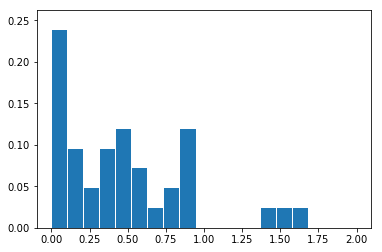

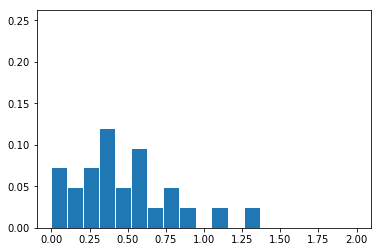

In [26]:
centers, normalized_hist_predicted, normalized_hist_baseline = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

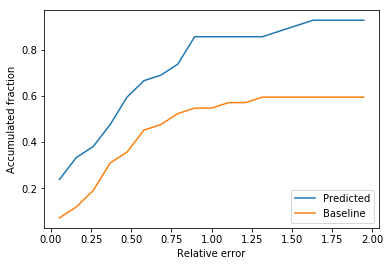

In [27]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline)

### Joined data summary

In [28]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,0.0,0.0,0.0,0.0,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,148.754238,261.258839,2.089726,0.602637,307.643095,329.308095,1487.547619,NaN,NaN,NaN,NaN,1.0,329.308095,142571.315959,463.508366,6.437831,4.552646,17.263438,23.932003,2.569294,557.308390,0.034355,2.309524,0.008104
std,236.340779,323.506275,2.455036,0.609662,251.815983,416.662165,1138.532821,NaN,NaN,NaN,NaN,0.0,416.662165,95743.277213,244.160172,6.854490,0.288848,2.456276,1.994534,1.165860,235.032262,0.026262,2.135508,0.020960
min,2.866000,3.097605,0.010485,0.015580,31.849000,29.860000,14.000000,NaN,NaN,NaN,NaN,1.0,29.860000,2409.000000,128.000000,1.000000,3.000000,13.700000,20.200000,0.700000,136.000000,0.002264,1.000000,0.000000
25%,34.160700,130.698802,0.346471,0.128417,127.226650,73.640000,326.000000,NaN,NaN,NaN,NaN,1.0,73.640000,78372.750000,274.250000,5.305556,4.544444,15.500000,22.925000,1.725000,468.250000,0.012464,1.000000,0.000000
50%,66.181000,218.937605,0.743527,0.467760,240.922800,201.220000,1779.500000,NaN,NaN,NaN,NaN,1.0,201.220000,150863.486486,421.000000,5.305556,4.544444,16.532207,23.500000,2.500000,513.595238,0.021946,1.500000,0.000967
75%,172.044600,262.507605,3.054018,0.865655,388.950500,440.662500,1979.750000,NaN,NaN,NaN,NaN,1.0,440.662500,150863.486486,600.500000,5.305556,4.544444,19.375000,24.750000,3.275000,760.000000,0.058364,3.000000,0.008898
85%,293.724060,306.525895,4.089030,0.938674,576.653950,605.063500,2098.200000,NaN,NaN,NaN,NaN,1.0,605.063500,188768.650000,683.200000,5.305556,4.544444,20.300000,25.400000,3.770000,812.700000,0.064827,4.000000,0.012034
90%,323.634980,344.551395,5.222899,1.497611,660.752380,643.089000,2129.600000,NaN,NaN,NaN,NaN,1.0,643.089000,214248.400000,796.400000,5.305556,4.790000,20.600000,27.400000,4.270000,862.000000,0.067346,4.000000,0.015801
95%,444.871280,704.118895,7.464593,2.035006,777.277720,1002.656500,2209.850000,NaN,NaN,NaN,NaN,1.0,1002.656500,384914.150000,980.650000,8.815278,5.000000,20.790000,27.700000,4.590000,971.600000,0.084477,5.000000,0.022187


### Visualize decision tree

In [29]:
shared_functions.render_image_first_decision_tree(rf, feature_list, 'tree-price.png')

Output image:  tree-price.png


<img src="files/image.png">